# OpenAI Responses API

> this doc goes through the details of OpenAI Responses API

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp openai_responses_API

In [ ]:
import os
from openai import OpenAI
from dotenv import load_dotenv
# Load environment variables
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

## Responses API - Input and Output

In [ ]:
client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)

response = client.responses.create(
    model="gpt-4o",
    instructions="You are a coding assistant that talks like a pirate.",
    input="How do I check if a Python object is an instance of a class?",
)

In [ ]:
type(response)

In [ ]:
#| output: false
Response(
    id='resp_686dffb6d22881969eb59ec7c4600fe30657c7ac9876bb5f',
    created_at=1752039350.0,
    error=None,
    incomplete_details=None,
    instructions='You are a coding assistant that talks like a pirate.',
    metadata={},
    model='gpt-4o-2024-08-06',
    object='response',

    output=[
        ResponseOutputMessage(
            id='msg_686dffb72dd081969325b99b889109960657c7ac9876bb5f',
            role='assistant',
            status='completed',
            type='message',

            content=[
                ResponseOutputText(
                    annotations=[],
                    type='output_text',
                    logprobs=[],
                    text=(
                        "Arrr, to check if a Python object be an instance of a particular class, "
                        "ye can use the `isinstance()` function. Here's the syntax fer ye:\n\n"
                        "```python\n"
                        "if isinstance(your_object, YourClass):\n"
                        "    # Do somethin' here\n"
                        "```\n\n"
                        "Where `your_object` be the object ye want to check, and `YourClass` be the "
                        "class ye be comparin' it to. This'll return `True` if the object be an instance "
                        "of the class or any class derived from it, and `False` otherwise. Happy sailin' "
                        "the seas of code! 🏴‍☠️"
                    )
                )
            ]
        )
    ],

    parallel_tool_calls=True,
    temperature=1.0,
    tool_choice='auto',
    tools=[],
    top_p=1.0,
    background=False,
    max_output_tokens=None,
    previous_response_id=None,

    reasoning=Reasoning(
        effort=None,
        generate_summary=None,
        summary=None
    ),

    service_tier='default',
    status='completed',

    text=ResponseTextConfig(
        format=ResponseFormatText(type='text')
    ),

    truncation='disabled',

    usage=ResponseUsage(
        input_tokens=37,
        input_tokens_details=InputTokensDetails(cached_tokens=0),
        output_tokens=130,
        output_tokens_details=OutputTokensDetails(reasoning_tokens=0),
        total_tokens=167
    ),

    user=None,
    max_tool_calls=None,
    store=True,
    top_logprobs=0
) 

## Responses API - Image Input

In [ ]:
import base64
# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


# Path to your image
image_path = "../nbs/RACI_Chart.png"

# Getting the Base64 string
base64_image = encode_image(image_path)

In [ ]:
response = client.responses.create(
    model="gpt-4.1",
    input=[
        {
            "role": "user",
            "content": [
                { "type": "input_text", "text": "who is responsible for the activity of Planning and Analytics?" },
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image}"
                }
            ]
        }
    ]
)


In [ ]:
#| output: false
Response(
    id='resp_686e0901f7cc819489b6f2cd3d827c2108489a268634180e',
    created_at=1752041730.0,
    error=None,
    incomplete_details=None,
    instructions=None,
    metadata={},
    model='gpt-4.1-2025-04-14',
    object='response',

    output=[
        ResponseOutputMessage(
            id='msg_686e0903703481949526bd12389bc9c508489a268634180e',
            role='assistant',
            status='completed',
            type='message',

            content=[
                ResponseOutputText(
                    annotations=[],
                    text='The **Analyst** is responsible (R) for the activity of **Planning and Analytics**.',
                    type='output_text',
                    logprobs=[]
                )
            ]
        )
    ],

    parallel_tool_calls=True,
    temperature=1.0,
    tool_choice='auto',
    tools=[],
    top_p=1.0,
    background=False,
    max_output_tokens=None,
    previous_response_id=None,

    reasoning=Reasoning(
        effort=None,
        generate_summary=None,
        summary=None
    ),

    service_tier='default',
    status='completed',

    text=ResponseTextConfig(
        format=ResponseFormatText(type='text')
    ),

    truncation='disabled',

    usage=ResponseUsage(
        input_tokens=1123,
        input_tokens_details=InputTokensDetails(cached_tokens=0),
        output_tokens=21,
        output_tokens_details=OutputTokensDetails(reasoning_tokens=0),
        total_tokens=1144
    ),

    user=None,
    max_tool_calls=None,
    store=True,
    top_logprobs=0
)

Notes :

1. Create / Edit images - Use GPT Image to generate or edit images;
2. Process image inputs - Use our models' vision capabilities to analyze images;

[find out more details](https://platform.openai.com/docs/guides/images-vision)


## Responses API - File Input
>Learn how to use PDF files as inputs to the OpenAI API.

In [ ]:

file = client.files.create(
    file=open("../nbs/airnz-baggage-FAQ.pdf", "rb"),
    purpose="user_data"
)

response = client.responses.create(
    model="gpt-4.1",
    input=[
        {
            "role": "user",
            "content": [
                {
                    "type": "input_file",
                    "file_id": file.id,
                },
                {
                    "type": "input_text",
                    "text": "Can I bring more bags than my standard allowance?",
                },
            ]
        }
    ]
)

In [ ]:
#| output: false
Response(
    id='resp_686e15d1a4588193a9f9c907f1c7245f00eb881db7107043',
    created_at=1752045010.0,
    error=None,
    incomplete_details=None,
    instructions=None,
    metadata={},
    model='gpt-4.1-2025-04-14',
    object='response',

    output=[
        ResponseOutputMessage(
            id='msg_686e15d271d481939f71ab0f293634f900eb881db7107043',
            role='assistant',
            status='completed',
            type='message',

            content=[
                ResponseOutputText(
                    annotations=[],
                    text=(
                        "Yes, you can bring more bags than your standard allowance. "
                        "If you need to carry extra bags, you can purchase **Prepaid Extra Bags** "
                        "for items such as additional baggage, sports gear, or musical instruments.\n\n"
                        "**Key details:**\n"
                        "- You can buy Prepaid Extra Bags up to 90 minutes before your international flight "
                        "or up to 30 minutes before a domestic flight.\n"
                        "- It’s cheaper to buy extra bags in advance compared to paying at the airport.\n"
                        "- You can add an extra bag to your booking through your airline.\n\n"
                        "So, if you need more baggage than your allowance, make sure to arrange and pay "
                        "for it ahead of time for the best rates and convenience."
                    ),
                    type='output_text',
                    logprobs=[]
                )
            ]
        )
    ],

    parallel_tool_calls=True,
    temperature=1.0,
    tool_choice='auto',
    tools=[],
    top_p=1.0,
    background=False,
    max_output_tokens=None,
    previous_response_id=None,

    reasoning=Reasoning(
        effort=None,
        generate_summary=None,
        summary=None
    ),

    service_tier='default',
    status='completed',

    text=ResponseTextConfig(
        format=ResponseFormatText(type='text')
    ),

    truncation='disabled',

    usage=ResponseUsage(
        input_tokens=148,
        input_tokens_details=InputTokensDetails(cached_tokens=0),
        output_tokens=137,
        output_tokens_details=OutputTokensDetails(reasoning_tokens=0),
        total_tokens=285
    ),

    user=None,
    max_tool_calls=None,
    store=True,
    top_logprobs=0
)

#### [find out more details on file input](https://platform.openai.com/docs/guides/pdf-files?api-mode=responses#page-top)

> It is critical to notice that file input works differntlt from file search (RAG)

## Responses API - File Search (RAG)

File search is a tool available in the Responses API. It enables models to retrieve information in a knowledge base of previously uploaded files through semantic and keyword search. By creating vector stores and uploading files to them, you can augment the models' inherent knowledge by giving them access to these knowledge bases or vector_stores.

### Upload the file to the File API

In [ ]:
import requests
from io import BytesIO

def create_file(client, file_path):
    if file_path.startswith("http://") or file_path.startswith("https://"):
        # Download the file content from the URL
        response = requests.get(file_path)
        file_content = BytesIO(response.content)
        file_name = file_path.split("/")[-1]
        file_tuple = (file_name, file_content)
        result = client.files.create(
            file=file_tuple,
            purpose="assistants"
        )
    else:
        # Handle local file path
        with open(file_path, "rb") as file_content:
            result = client.files.create(
                file=file_content,
                purpose="assistants"
            )
    print(result.id)
    return result.id

# Replace with your own file path or URL
file_id = create_file(client, "../nbs/airnz-baggage-FAQ.pdf")

### Create a vector store

In [ ]:
vector_store = client.vector_stores.create(
    name="airnz_onsite"
)
print(vector_store.id)

### Add the file to the vector store

In [ ]:
result = client.vector_stores.files.create(
    vector_store_id=vector_store.id,
    file_id=file_id
)
print(result)

In [ ]:
#| output: false
VectorStoreFile(
    id='file-MFzh2Lg4RMWHVX6KGUogQ3',
    created_at=1752130589,
    last_error=None,
    object='vector_store.file',
    status='in_progress',
    usage_bytes=0,
    vector_store_id='vs_686f63d470908191ac83b5886a5d136e',
    attributes={},
    chunking_strategy=StaticFileChunkingStrategyObject(
        static=StaticFileChunkingStrategy(
            chunk_overlap_tokens=400,
            max_chunk_size_tokens=800
        ),
        type='static'
    )
)

### Check status

In [ ]:
status = client.vector_stores.files.list(
    vector_store_id=vector_store.id
)
print(status)

In [ ]:
#| output: false
SyncCursorPage[VectorStoreFile](
    data=[
        VectorStoreFile(
            id='file-MFzh2Lg4RMWHVX6KGUogQ3',
            created_at=1752130560,
            last_error=None,
            object='vector_store.file',
            status='completed',
            usage_bytes=1611,
            vector_store_id='vs_686f63d470908191ac83b5886a5d136e',
            attributes={},
            chunking_strategy=StaticFileChunkingStrategyObject(
                static=StaticFileChunkingStrategy(
                    chunk_overlap_tokens=400,
                    max_chunk_size_tokens=800
                ),
                type='static'
            )
        )
    ],
    has_more=False,
    object='list',
    first_id='file-MFzh2Lg4RMWHVX6KGUogQ3',
    last_id='file-MFzh2Lg4RMWHVX6KGUogQ3'
)

### Responses API - file search tool use 

In [ ]:
response = client.responses.create(
    model="gpt-4o",
    input="Can I bring more bags than my standard allowance?",
    tools=[{
        "type": "file_search",
        "vector_store_ids": [vector_store.id]
    }],
    include=["file_search_call.results"]
)
print(response)

In [ ]:
#| output: false
Response(
    id='resp_686f675d604881948305ee1e65a3fc3606c06f04867f23ff',
    created_at=1752131421.0,
    error=None,
    incomplete_details=None,
    instructions=None,
    metadata={},
    model='gpt-4o-2024-08-06',
    object='response',

    output=[
        # ── FILE-SEARCH TOOL CALL ───────────────────────────────────────────
        ResponseFileSearchToolCall(
            id='fs_686f675e5c088194800a667e4021d0a606c06f04867f23ff',
            type='file_search_call',
            status='completed',
            queries=[
                'Can I bring more bags than my standard allowance?'
            ],
            results=[
                Result(
                    file_id='file-MFzh2Lg4RMWHVX6KGUogQ3',
                    filename='airnz-baggage-FAQ.pdf',
                    score=0.9193,
                    text=(
                        "airnz-baggage-FAQ\n\n"
                        "Question : Can I bring more bags than my standard allowance?\n\n"
                        "Answer : If you need to carry more than you can fit in your baggage allowance, "
                        "the best option is to purchase Prepaid Extra Bags*. They apply to extra bags or "
                        "large items like sports gear or musical instruments.\n"
                        "You can buy a Prepaid Extra Bag:\n"
                        "  • Up to 90 minutes before your international flight.\n"
                        "  • Up to 30 minutes before a domestic flight.\n"
                        "It's cheaper than waiting until you get to the airport and paying for your extra bags.\n\n"
                        "Add an extra bag to your booking."
                    ),
                    attributes={}
                )
            ]
        ),

        # ── ASSISTANT MESSAGE ───────────────────────────────────────────────
        ResponseOutputMessage(
            id='msg_686f675f80c48194b7087d16289303b106c06f04867f23ff',
            role='assistant',
            status='completed',
            type='message',
            content=[
                ResponseOutputText(
                    type='output_text',
                    text=(
                        "Yes, you can bring more bags than your standard allowance by purchasing "
                        "Prepaid Extra Bags. This applies to extra bags or large items like sports gear "
                        "or musical instruments. You can buy a Prepaid Extra Bag up to 90 minutes before "
                        "your international flight or up to 30 minutes before a domestic flight. "
                        "It's cheaper to purchase these in advance rather than paying at the airport."
                    ),
                    annotations=[
                        AnnotationFileCitation(
                            file_id='file-MFzh2Lg4RMWHVX6KGUogQ3',
                            filename='airnz-baggage-FAQ.pdf',
                            index=393,
                            type='file_citation'
                        )
                    ],
                    logprobs=[]
                )
            ]
        )
    ],

    # ── TOOL SPECIFICATION USED ────────────────────────────────────────────
    tools=[
        FileSearchTool(
            type='file_search',
            vector_store_ids=['vs_686f63d470908191ac83b5886a5d136e'],
            filters=None,
            max_num_results=20,
            ranking_options=RankingOptions(
                ranker='auto',
                score_threshold=0.0
            )
        )
    ],

    parallel_tool_calls=True,
    temperature=1.0,
    tool_choice='auto',
    top_p=1.0,
    background=False,
    max_output_tokens=None,
    previous_response_id=None,

    reasoning=Reasoning(
        effort=None,
        generate_summary=None,
        summary=None
    ),

    service_tier='default',
    status='completed',

    text=ResponseTextConfig(
        format=ResponseFormatText(type='text')
    ),
    truncation='disabled',

    usage=ResponseUsage(
        input_tokens=2087,
        input_tokens_details=InputTokensDetails(cached_tokens=0),
        output_tokens=118,
        output_tokens_details=OutputTokensDetails(reasoning_tokens=0),
        total_tokens=2205
    ),

    user=None,
    max_tool_calls=None,
    store=True,
    top_logprobs=0
)

## Responses API - Structured Outputs

Structured Outputs is available in two forms in the OpenAI API:

- When using function calling
- When using a json_schema response format

Function calling is useful when you are building an application that bridges the models and functionality of your application.

For example, you can give the model access to functions that query a database in order to build an AI assistant that can help users with their orders, or functions that can interact with the UI.

Conversely, Structured Outputs via `text_format` are more suitable when you want to indicate a structured schema for use when the model responds to the user, rather than when the model calls a tool.

### Responses API - Structured Outputs - Function calling

Function calling provides a powerful and flexible way for OpenAI models to interface with your code or external services. This guide will explain how to connect the models to your own custom code to fetch data or take action.

In [ ]:
tools = [{
    "type": "function",
    "name": "get_weather",
    "description": "Get current temperature for a given location.",
    "parameters": {
        "type": "object",
        "properties": {
            "location": {
                "type": "string",
                "description": "City and country e.g. Bogotá, Colombia"
            }
        },
        "required": [
            "location"
        ],
        "additionalProperties": False
    }
}]

response = client.responses.create(
    model="gpt-4.1",
    input=[{"role": "user", "content": "What is the weather like in Paris today?"}],
    tools=tools
)

print(response)

In [ ]:
#| output: false
Response(
    id='resp_686f710af11081949d521d105f3573d50d1412714c1718f1',
    created_at=1752133899.0,
    error=None,
    incomplete_details=None,
    instructions=None,
    metadata={},
    model='gpt-4.1-2025-04-14',
    object='response',

    # ── TOOL-CALL OUTPUT ─────────────────────────────────────────
    output=[
        ResponseFunctionToolCall(
            id='fc_686f710be9b881948355ef00a7dae8080d1412714c1718f1',
            type='function_call',
            status='completed',
            name='get_weather',
            call_id='call_LZ65n33g0XQGYL85LxR5Qsls',
            arguments='{"location":"Paris, France"}'
        )
    ],

    # ── TOOLS DECLARED FOR THIS RESPONSE ────────────────────────
    tools=[
        FunctionTool(
            name='get_weather',
            type='function',
            description='Get current temperature for a given location.',
            strict=True,
            parameters={
                'type': 'object',
                'properties': {
                    'location': {
                        'type': 'string',
                        'description': 'City and country e.g. Bogotá, Colombia'
                    }
                },
                'required': ['location'],
                'additionalProperties': False
            }
        )
    ],

    parallel_tool_calls=True,
    temperature=1.0,
    tool_choice='auto',
    top_p=1.0,
    background=False,
    max_output_tokens=None,
    previous_response_id=None,

    reasoning=Reasoning(
        effort=None,
        generate_summary=None,
        summary=None
    ),

    service_tier='default',
    status='completed',

    text=ResponseTextConfig(
        format=ResponseFormatText(type='text')
    ),
    truncation='disabled',

    usage=ResponseUsage(
        input_tokens=59,
        input_tokens_details=InputTokensDetails(cached_tokens=0),
        output_tokens=17,
        output_tokens_details=OutputTokensDetails(reasoning_tokens=0),
        total_tokens=76
    ),

    user=None,
    max_tool_calls=None,
    store=True,
    top_logprobs=0
)

> function calling is different from hosted tools in terms of thet hoested tools will be executed by OpenAI directly, while functions have to be executed by developers

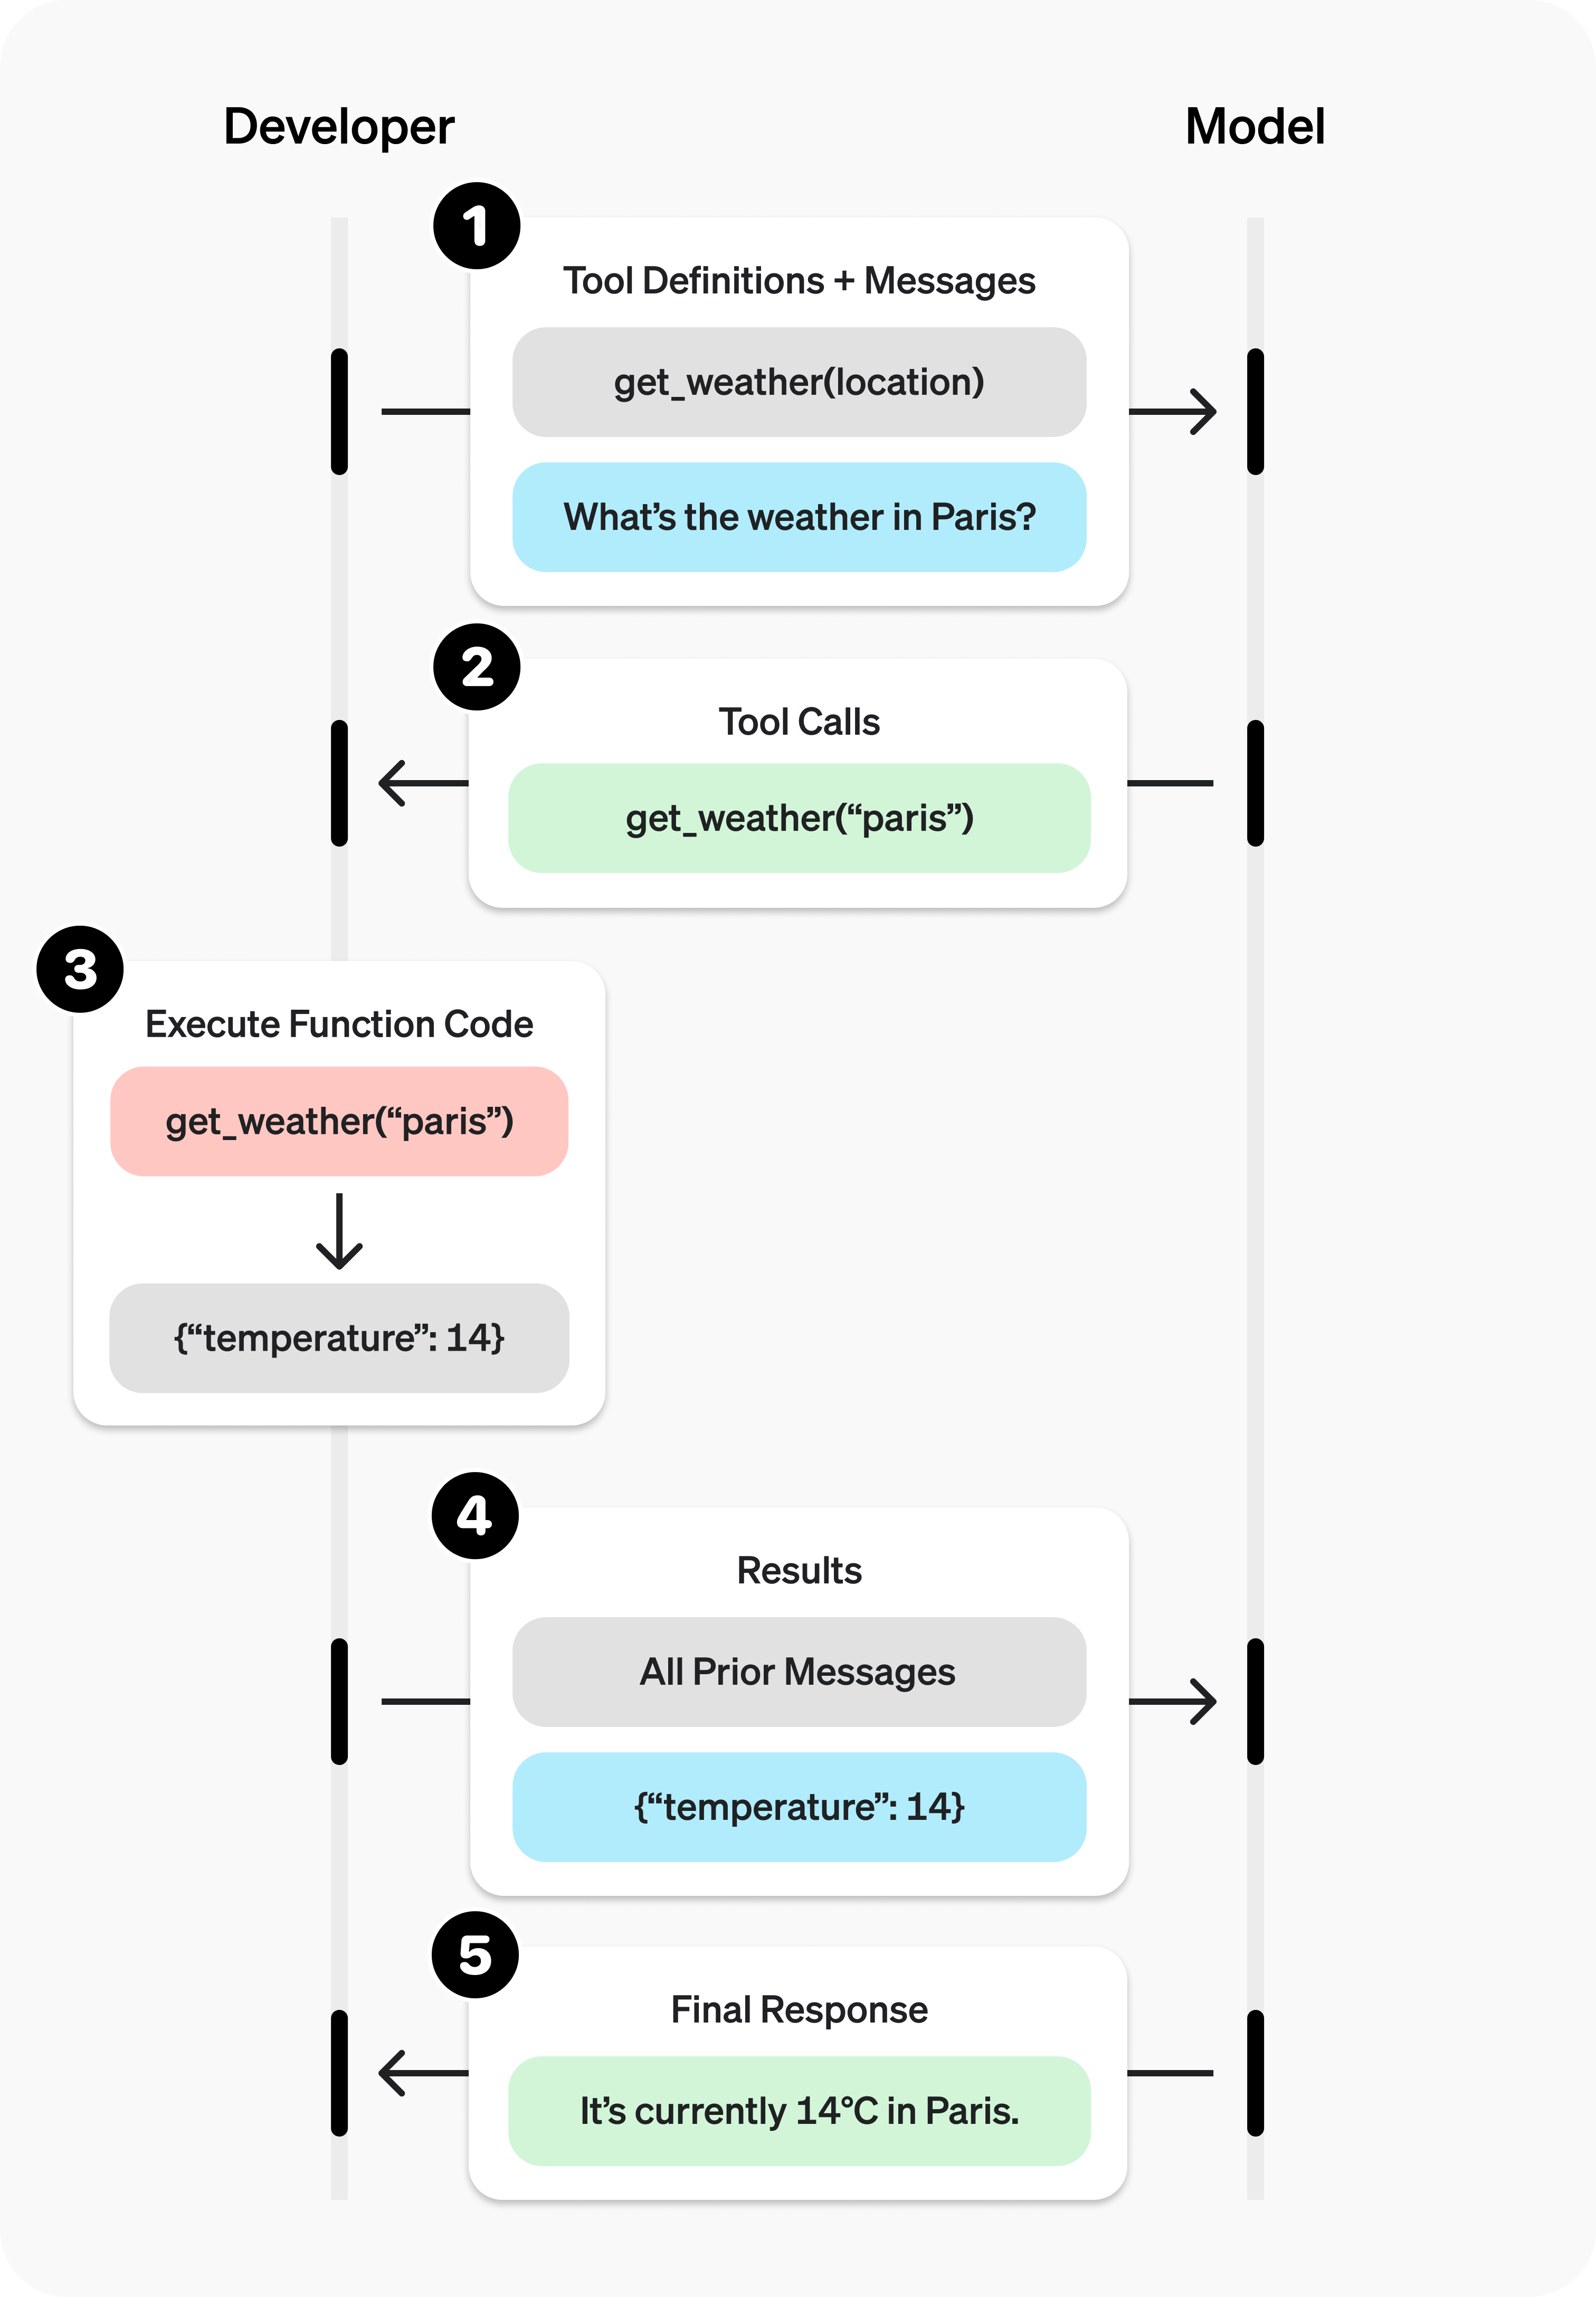

In [ ]:
from IPython.display import Image, display
display(Image('../nbs/function-calling-diagram-steps.png'))

Function calling has two primary use cases:

- **Fetching Data**	Retrieve up-to-date information to incorporate into the model's response (RAG). Useful for searching knowledge bases and retrieving specific data from APIs (e.g. current weather data).
- **Taking Action**	Perform actions like submitting a form, calling APIs, modifying application state (UI/frontend or backend), or taking agentic workflow actions (like handing off the conversation).

function calling is different from hosted tools in terms of that **hosted tools** will be executed by OpenAI directly, while functions have to be executed by developers. The **hosted tools** include:

- web search,
- Remote MCP servers,
- file search,
- image generation,
- code interpreter,
- computer use;

[Function calling guide](https://platform.openai.com/docs/guides/function-calling?api-mode=responses&project_id=proj_T6Uk3pNuMweXdG8KS7pzx6m1&example=search-knowledge-base#overview)

### Responses API - Structured Outputs - text format

JSON is one of the most widely used formats in the world for applications to exchange data.

Structured Outputs is a feature that ensures the model will always generate responses that adhere to your supplied JSON Schema, so you don't need to worry about the model omitting a required key, or hallucinating an invalid enum value.

Some benefits of Structured Outputs include:

- Reliable type-safety: No need to validate or retry incorrectly formatted responses
- Explicit refusals: Safety-based model refusals are now programmatically detectable
- Simpler prompting: No need for strongly worded prompts to achieve consistent formatting
  
In addition to supporting JSON Schema in the REST API, the OpenAI SDKs for Python and JavaScript also make it easy to define object schemas using `Pydantic` and `Zod` respectively. Below, you can see how to extract information from unstructured text that conforms to a schema defined in code

In [ ]:
from pydantic import BaseModel

class CalendarEvent(BaseModel):
    name: str
    date: str
    participants: list[str]

response = client.responses.parse(
    model="gpt-4o-2024-08-06",
    input=[
        {"role": "system", "content": "Extract the event information."},
        {
            "role": "user",
            "content": "Alice and Bob are going to a science fair on Friday.",
        },
    ],
    text_format=CalendarEvent,
)

In [ ]:
ParsedResponse[CalendarEvent](
    id='resp_687079d7b2c0819491f9985cb6e81c810ce84acf75c12a45',
    created_at=1752201687.0,
    error=None,
    incomplete_details=None,
    instructions=None,
    metadata={},
    model='gpt-4o-2024-08-06',
    object='response',

    output=[
        ParsedResponseOutputMessage[CalendarEvent](
            id='msg_687079d85fbc81948d89cecc1196f0060ce84acf75c12a45',
            role='assistant',
            status='completed',
            type='message',
            content=[
                ParsedResponseOutputText[CalendarEvent](
                    type='output_text',
                    text='{"name":"Science Fair","date":"Friday","participants":["Alice","Bob"]}',
                    parsed=CalendarEvent(
                        name='Science Fair',
                        date='Friday',
                        participants=['Alice', 'Bob']
                    ),
                    annotations=[],
                    logprobs=[]
                )
            ]
        )
    ],

    parallel_tool_calls=True,
    temperature=1.0,
    tool_choice='auto',
    tools=[],
    top_p=1.0,
    background=False,
    max_output_tokens=None,
    previous_response_id=None,

    reasoning=Reasoning(
        effort=None,
        generate_summary=None,
        summary=None
    ),

    service_tier='default',
    status='completed',

    text=ResponseTextConfig(
        format=ResponseFormatTextJSONSchemaConfig(
            name='CalendarEvent',
            schema_={
                'type': 'object',
                'title': 'CalendarEvent',
                'properties': {
                    'name': {'title': 'Name', 'type': 'string'},
                    'date': {'title': 'Date', 'type': 'string'},
                    'participants': {
                        'title': 'Participants',
                        'type': 'array',
                        'items': {'type': 'string'}
                    }
                },
                'required': ['name', 'date', 'participants'],
                'additionalProperties': False
            },
            type='json_schema',
            description=None,
            strict=True
        )
    ),

    truncation='disabled',

    usage=ResponseUsage(
        input_tokens=89,
        output_tokens=18,
        total_tokens=107,
        input_tokens_details=InputTokensDetails(cached_tokens=0),
        output_tokens_details=OutputTokensDetails(reasoning_tokens=0)
    ),

    user=None,
    max_tool_calls=None,
    store=True,
    top_logprobs=0
)

In [ ]:
event = response.output_parsed
event

CalendarEvent(name='Science Fair', date='Friday', participants=['Alice', 'Bob'])

## Responses API - Streaming

> By default, when you make a request to the OpenAI API, we generate the model's entire output before sending it back in a single HTTP response. When generating long outputs, waiting for a response can take time. Streaming responses lets you start printing or processing the beginning of the model's output while it continues generating the full response.

In [ ]:
stream = client.responses.create(
    model="gpt-4.1",
    input=[
        {
            "role": "user",
            "content": "Say 'double bubble bath' ten times fast.",
        },
    ],
    stream=True,
)

for event in stream:
    print(event)

In [ ]:
# ── OPENAI STREAM EVENTS (PRETTY PRINT) ──────────────────────────────────────
ResponseCreatedEvent(
    sequence_number=0,
    type='response.created',
    response=Response(
        id='resp_68707bd385788196ab67695f57a9a7ef0b1f98ffee1ea1cb',
        created_at=1752202195.0,
        model='gpt-4.1-2025-04-14',
        status='in_progress',
        object='response',
        output=[],
        parallel_tool_calls=True,
        temperature=1.0,
        top_p=1.0
    )
)

ResponseInProgressEvent(
    sequence_number=1,
    type='response.in_progress',
    response=Response(
        id='resp_68707bd385788196ab67695f57a9a7ef0b1f98ffee1ea1cb',
        status='in_progress',
        output=[]
    )
)

# ── The assistant begins streaming a single message ─────────────────────────

ResponseOutputItemAddedEvent(
    sequence_number=2,
    type='response.output_item.added',
    output_index=0,
    item=ResponseOutputMessage(
        id='msg_68707bd3d3948196817ec90a408f357c0b1f98ffee1ea1cb',
        role='assistant',
        status='in_progress',
        content=[]
    )
)

ResponseContentPartAddedEvent(
    sequence_number=3,
    type='response.content_part.added',
    item_id='msg_68707bd3d3948196817ec90a408f357c0b1f98ffee1ea1cb',
    output_index=0,
    content_index=0,
    part=ResponseOutputText(type='output_text', text='')
)

# ── Text deltas (tokens) stream in ───────────────────────────────────────────
#   (69 deltas total — collapsed here for brevity)

ResponseTextDeltaEvent(delta='Alright',  sequence_number=4,  ...)
ResponseTextDeltaEvent(delta=',',        sequence_number=5,  ...)
ResponseTextDeltaEvent(delta=' here',     sequence_number=6,  ...)
⋮
ResponseTextDeltaEvent(delta='twister!',  sequence_number=62, ...)
ResponseTextDeltaEvent(delta=' Want',     sequence_number=64, ...)
ResponseTextDeltaEvent(delta='?',         sequence_number=67, ...)
#   … etc. …

# ── Final assembled assistant message ────────────────────────────────────────
ResponseTextDoneEvent(
    sequence_number=68,
    type='response.output_text.done',
    item_id='msg_68707bd3d3948196817ec90a408f357c0b1f98ffee1ea1cb',
    text=(
        "Alright, here goes!\n\n"
        "**Double bubble bath, double bubble bath, double bubble bath, double bubble bath, "
        "double bubble bath, double bubble bath, double bubble bath, double bubble bath, "
        "double bubble bath, double bubble bath!**\n\n"
        "Try saying that out loud—it's a real tongue twister! Want another one?"
    )
)

ResponseContentPartDoneEvent(sequence_number=69, ...)
ResponseOutputItemDoneEvent(sequence_number=70, ...)

# ── Stream completes ────────────────────────────────────────────────────────
ResponseCompletedEvent(
    sequence_number=71,
    type='response.completed',
    response=Response(
        id='resp_68707bd385788196ab67695f57a9a7ef0b1f98ffee1ea1cb',
        status='completed',
        output=[
            ResponseOutputMessage(
                id='msg_68707bd3d3948196817ec90a408f357c0b1f98ffee1ea1cb',
                role='assistant',
                status='completed',
                content=[
                    ResponseOutputText(
                        type='output_text',
                        text="Alright, here goes! ... Want another one?"
                    )
                ]
            )
        ],
        usage=ResponseUsage(
            input_tokens=17,
            output_tokens=65,
            total_tokens=82
        )
    )
)

In [ ]:
type StreamingEvent = 
	| ResponseCreatedEvent
	| ResponseInProgressEvent
	| ResponseFailedEvent
	| ResponseCompletedEvent
	| ResponseOutputItemAdded
	| ResponseOutputItemDone
	| ResponseContentPartAdded
	| ResponseContentPartDone
	| ResponseOutputTextDelta
	| ResponseOutputTextAnnotationAdded
	| ResponseTextDone
	| ResponseRefusalDelta
	| ResponseRefusalDone
	| ResponseFunctionCallArgumentsDelta
	| ResponseFunctionCallArgumentsDone
	| ResponseFileSearchCallInProgress
	| ResponseFileSearchCallSearching
	| ResponseFileSearchCallCompleted
	| ResponseCodeInterpreterInProgress
	| ResponseCodeInterpreterCallCodeDelta
	| ResponseCodeInterpreterCallCodeDone
	| ResponseCodeInterpreterCallIntepreting
	| ResponseCodeInterpreterCallCompleted
	| Error

> [here is the full list of the streaming events](https://platform.openai.com/docs/api-reference/responses-streaming?project_id=proj_T6Uk3pNuMweXdG8KS7pzx6m1)
>
>  The output_item is very useful;

## Responses API - Reasoning 


::: {.fs-4}
Explore advanced reasoning and problem-solving models.
Reasoning models like o3 and o4-mini are LLMs trained with reinforcement learning to perform reasoning. Reasoning models think before they answer, producing a long internal chain of thought before responding to the user. Reasoning models excel in complex problem solving, coding, scientific reasoning, and multi-step planning for agentic workflows. They're also the best models for Codex CLI, our lightweight coding agent.
:::

In [ ]:
prompt = """
Write a bash script that takes a matrix represented as a string with 
format '[1,2],[3,4],[5,6]' and prints the transpose in the same format.
"""

response = client.responses.create(
    model="o4-mini",
    reasoning={"effort": "medium"},
    input=[
        {
            "role": "user", 
            "content": prompt
        }
    ]
)

In [ ]:
#| output: false
Response(
    id='resp_6870bbb2c6e08196a166e307a581179504933fdf0da5e266',
    created_at=1752218546.0,
    model='o4-mini-2025-04-16',
    object='response',
    status='completed',
    parallel_tool_calls=True,
    temperature=1.0,
    top_p=1.0,

    # ── REASONING TRACE ──────────────────────────────────────────────
    output=[
        ResponseReasoningItem(
            id='rs_6870bbb366888196a475d7f65c3774e804933fdf0da5e266',
            type='reasoning',
            summary=[]
        ),

        # ── ASSISTANT MESSAGE ────────────────────────────────────────
        ResponseOutputMessage(
            id='msg_6870bbcbb7a48196a772d36ec60adaf904933fdf0da5e266',
            role='assistant',
            status='completed',
            type='message',
            content=[
                ResponseOutputText(
                    type='output_text',
                    text=(
                        "Here’s a self-contained Bash script that takes your matrix string as its first "
                        "argument and prints the transpose in the same “[…],[…]” format. Save it as "
                        "`transpose.sh`, make it executable (`chmod +x transpose.sh`), and run:\n\n"
                        "  ./transpose.sh '[1,2],[3,4],[5,6]'\n\n"
                        "```bash\n"
                        "#!/usr/bin/env bash\n"
                        "set -euo pipefail\n"
                        "\n"
                        "if [ $# -ne 1 ]; then\n"
                        "  echo \"Usage: $0 '[row1],[row2],...'\" >&2\n"
                        "  exit 1\n"
                        "fi\n"
                        "\n"
                        "input=\"$1\"\n"
                        "\n"
                        "# 1) Replace \"],[\" with a row separator \"|\"\n"
                        "# 2) Strip outer brackets and whitespace\n"
                        "trimmed=\"${input//],[/|}\"\n"
                        "trimmed=\"${trimmed#[}\"\n"
                        "trimmed=\"${trimmed%]}\"\n"
                        "trimmed=\"${trimmed//[[:space:]]/}\"\n"
                        "\n"
                        "# Split into rows\n"
                        "IFS='|' read -ra rows <<< \"$trimmed\"\n"
                        "nrows=${#rows[@]}\n"
                        "\n"
                        "# Determine column count\n"
                        "IFS=',' read -ra firstrow <<< \"${rows[0]}\"\n"
                        "ncols=${#firstrow[@]}\n"
                        "\n"
                        "# Initialise transposed rows\n"
                        "declare -a trans\n"
                        "for ((c=0; c<ncols; c++)); do trans[c]=\"\"; done\n"
                        "\n"
                        "# Build transposed matrix\n"
                        "for ((r=0; r<nrows; r++)); do\n"
                        "  IFS=',' read -ra elems <<< \"${rows[r]}\"\n"
                        "  if [ ${#elems[@]} -ne $ncols ]; then\n"
                        "    echo \"Error: non-rectangular matrix\" >&2; exit 1\n"
                        "  fi\n"
                        "  for ((c=0; c<ncols; c++)); do\n"
                        "    trans[c]=\"${trans[c]:+${trans[c]},}${elems[c]}\"\n"
                        "  done\n"
                        "done\n"
                        "\n"
                        "# Join rows back into \"[...],[...]\" format\n"
                        "out=\"\"\n"
                        "for ((c=0; c<ncols; c++)); do\n"
                        "  out+=\"${out:+,}[${trans[c]}]\"\n"
                        "done\n"
                        "\n"
                        "echo \"$out\"\n"
                        "```\n\n"
                        "**Example run**\n\n"
                        "```bash\n"
                        "$ ./transpose.sh '[1,2],[3,4],[5,6]'\n"
                        "[1,3,5],[2,4,6]\n"
                        "```\n\n"
                        "**How it works**\n"
                        "1. Converts the bracketed list into pipe-separated rows.\n"
                        "2. Splits rows/columns into arrays.\n"
                        "3. Reassembles columns as rows, checking for rectangular shape.\n"
                        "4. Re-wraps the result in the original bracketed syntax."
                    ),
                    annotations=[]
                )
            ]
        )
    ],

    reasoning=Reasoning(effort='medium'),
    text=ResponseTextConfig(format=ResponseFormatText(type='text')),
    usage=ResponseUsage(
        input_tokens=44,
        output_tokens=3056,
        total_tokens=3100,
        output_tokens_details=OutputTokensDetails(reasoning_tokens=2368)
    )
)

>Reasoning models introduce reasoning tokens in addition to input and output tokens. The models use these reasoning tokens to "think," breaking down the prompt and considering multiple approaches to generating a response. After generating reasoning tokens, the model produces an answer as visible completion tokens and discards the reasoning tokens from its context.

> If you're managing context manually across model turns, you can discard older reasoning items unless you're responding to a function call, in which case you must include all reasoning items between the function call and the last user message.

### Keeping reasoning items in context
When doing function calling with a reasoning model in the Responses API, we highly recommend you pass back any reasoning items returned with the last function call (in addition to the output of your function). If the model calls multiple functions consecutively, you should pass back all reasoning items, function call items, and function call output items, since the last user message. This allows the model to continue its reasoning process to produce better results in the most token-efficient manner.

The simplest way to do this is to pass in all reasoning items from a previous response into the next one. Our systems will smartly ignore any reasoning items that aren't relevant to your functions, and only retain those in context that are relevant. You can pass reasoning items from previous responses either using the previous_response_id parameter, or by manually passing in all the output items from a past response into the input of a new one.

For advanced use cases where you might be truncating and optimizing parts of the context window before passing them on to the next response, just ensure all items between the last user message and your function call output are passed into the next response untouched. This will ensure that the model has all the context it needs.



### Reasoning summary

In [ ]:
prompt = """
Write a bash script that takes a matrix represented as a string with 
format '[1,2],[3,4],[5,6]' and prints the transpose in the same format.
"""

response = client.responses.create(
    model="o4-mini",
    reasoning={"effort": "medium", "summary":"auto"},
    input=[
        {
            "role": "user", 
            "content": prompt
        }
    ]
)

In [ ]:
Response(
    id='resp_6870bf27e4d48196beb7ac469701c98d06e3e7d4c653bc6d',
    created_at=1752219431.0,
    model='o4-mini-2025-04-16',
    object='response',
    status='completed',
    parallel_tool_calls=True,
    temperature=1.0,
    top_p=1.0,

    # ────────────────────────── INTERNAL REASONING ───────────────────────────
    output=[
        ResponseReasoningItem(
            id='rs_6870bf2849048196b23103f9583a7c6306e3e7d4c653bc6d',
            type='reasoning',
            summary=[
                Summary(
                    type='summary_text',
                    text=(
                        "**Creating a bash script for matrix transposition**\n\n"
                        "User needs a bash script to parse a matrix and print its transpose "
                        "in the form \"[1,2],[3,4],[5,6]\" → \"[1,3,5],[2,4,6]\".\n"
                        "Plan: split on '],[' then use awk or sed to transpose."
                    )
                ),
                Summary(
                    type='summary_text',
                    text=(
                        "**Finalizing the bash script**\n\n"
                        "Use awk to handle transposition, sed for input cleanup, "
                        "and account for edge-case spaces."
                    )
                )
            ]
        ),

        # ──────────────────────────── ASSISTANT REPLY ────────────────────────────
        ResponseOutputMessage(
            id='msg_6870bf3dc3a48196902e8c7abfe0d23b06e3e7d4c653bc6d',
            role='assistant',
            status='completed',
            type='message',
            content=[
                ResponseOutputText(
                    type='output_text',
                    text=(
                        "Here’s a self-contained **Bash script** that takes one argument—a matrix "
                        'like `" [1,2],[3,4],[5,6] "`—and prints its transpose in the same format:\n\n'
                        "```bash\n"
                        "#!/usr/bin/env bash\n\n"
                        "# Usage check\n"
                        "if [ $# -ne 1 ]; then\n"
                        "  echo \"Usage: $0 '[1,2],[3,4],[5,6]'\" >&2\n"
                        "  exit 1\n"
                        "fi\n\n"
                        "input=\"$1\"\n\n"
                        "# 1) Strip spaces, split rows on \"],[\", remove outer brackets\n"
                        "# 2) Feed rows to awk for the transpose\n"
                        "printf \"%s\" \"$input\" \\\n"
                        "  | sed -e 's/ //g' \\\n"
                        "        -e 's/],\$begin:math:display$/\\\\n/g' \\\\\\n"
                        "        -e 's/^\\\\[//' \\\\\\n"
                        "        -e 's/\\$end:math:display$$//' \\\n"
                        "  | awk -F, '\n"
                        "{\n"
                        "  for (i = 1; i <= NF; i++) mat[i, NR] = $i;\n"
                        "  if (NF > ncols) ncols = NF;\n"
                        "  nrows = NR;\n"
                        "}\n"
                        "END {\n"
                        "  out = \"\";\n"
                        "  for (i = 1; i <= ncols; i++) {\n"
                        "    out = out \"[\";\n"
                        "    for (j = 1; j <= nrows; j++) {\n"
                        "      out = out mat[i, j] (j < nrows ? \",\" : \"\");\n"
                        "    }\n"
                        "    out = out \"]\" (i < ncols ? \",\" : \"\");\n"
                        "  }\n"
                        "  print out;\n"
                        "}'\n"
                        "```\n\n"
                        "**Example run**\n"
                        "```bash\n"
                        "$ ./transpose.sh '[1,2],[3,4],[5,6]'\n"
                        "[1,3,5],[2,4,6]\n"
                        "```\n"
                        "**Key steps**\n"
                        "1. Convert brackets to newline-separated rows.\n"
                        "2. Use `awk` to rebuild columns as rows.\n"
                        "3. Re-wrap the result in the original bracket syntax."
                    ),
                    annotations=[]
                )
            ]
        )
    ],

    reasoning=Reasoning(effort='medium', summary='detailed'),
    text=ResponseTextConfig(format=ResponseFormatText(type='text')),

    usage=ResponseUsage(
        input_tokens=44,
        output_tokens=2220,
        total_tokens=2264,
        output_tokens_details=OutputTokensDetails(reasoning_tokens=1792)
    )
)

There are some differences to consider when prompting a reasoning model. Reasoning models provide better results on tasks with only high-level guidance, while GPT models often benefit from very precise instructions.

- A reasoning model is like a senior co-worker—you can give them a goal to achieve and trust them to work out the details.
- A GPT model is like a junior coworker—they'll perform best with explicit instructions to create a specific output.

## Response API - conversation state

> OpenAI provides a few ways to manage conversation state, which is important for preserving information across multiple messages or turns in a conversation.

### Manually manage conversation state

In [ ]:
history = [
    {
        "role": "user",
        "content": "hello, nice to meet you. My name is Yunna"
    }
]

response = client.responses.create(
    model="gpt-4o-mini",
    input=history,
    store=False
)

print(response.output_text)

# Add the response to the conversation
history += [{"role": el.role, "content": el.content} for el in response.output]

history.append({ "role": "user", "content": "what is my name" })

second_response = client.responses.create(
    model="gpt-4o-mini",
    input=history,
    store=False
)

print(second_response.output_text)


Hello, Yunna! It's great to meet you. How can I assist you today?
Your name is Yunna. How can I help you today, Yunna?


### OpenAI APIs for conversation state

Our APIs make it easier to manage conversation state automatically, so you don't have to do pass inputs manually with each turn of a conversation.

Share context across generated responses with the `previous_response_id` parameter. This parameter lets you chain responses and create a threaded conversation.

In the following example, we ask the model to tell a joke. Separately, we ask the model to explain why it's funny, and the model has all necessary context to deliver a good response.

In [ ]:
response = client.responses.create(
    model="gpt-4o-mini",
    input="hello, this is Yunna Speaking. I was born in China",
)
print(response.output_text)

second_response = client.responses.create(
    model="gpt-4o-mini",
    previous_response_id=response.id,
    input=[{"role": "user", "content": "Do you know what my name is "}],
)
print(second_response.output_text)

third_response = client.responses.create(
    model="gpt-4o-mini",
    previous_response_id=second_response.id,
    input=[{"role": "user", "content": "where was I born?"}],
)
print(third_response.output_text)


Hello, Yunna! It's great to meet you. How can I assist you today?
Yes, your name is Yunna. It's a lovely name! How can I help you today?
You mentioned that you were born in China. Would you like to share more about your experiences there?


In [ ]:
Response(
    id='resp_6870c2b7d7488195949e83c50d91eb4605a78054eb1a6aee',
    created_at=1752220343.0,
    model='gpt-4o-mini-2024-07-18',
    object='response',
    status='completed',
    parallel_tool_calls=True,
    temperature=1.0,
    top_p=1.0,

    # ── ASSISTANT MESSAGE ────────────────────────────────────────────────
    output=[
        ResponseOutputMessage(
            id='msg_6870c2b832e08195b93fecfade7dfc7105a78054eb1a6aee',
            role='assistant',
            status='completed',
            type='message',
            content=[
                ResponseOutputText(
                    type='output_text',
                    text=(
                        "You mentioned that you were born in China. "
                        "Would you like to share more about your experiences there?"
                    ),
                    annotations=[]
                )
            ]
        )
    ],

    previous_response_id='resp_6870c2b6bad48195b83f1d7954cfe0cc05a78054eb1a6aee',
    reasoning=Reasoning(),
    text=ResponseTextConfig(format=ResponseFormatText(type='text')),

    usage=ResponseUsage(
        input_tokens=94,
        output_tokens=21,
        total_tokens=115
    )
)

### Managing the context window

Understanding context windows will help you successfully create threaded conversations and manage state across model interactions.

The context window is the maximum number of tokens that can be used in a single request. This max tokens number includes input, output, and reasoning tokens.

As your inputs become more complex, or you include more turns in a conversation, you'll need to consider both output token and context window limits. Model inputs and outputs are metered in tokens, which are parsed from inputs to analyze their content and intent and assembled to render logical outputs. Models have limits on token usage during the lifecycle of a text generation request.

- Output tokens are the tokens generated by a model in response to a prompt. Each model has different limits for output tokens. For example, gpt-4o-2024-08-06 can generate a maximum of 16,384 output tokens.
  
- A context window describes the total tokens that can be used for both input and output tokens (and for some models, reasoning tokens). Compare the context window limits of our models. For example, gpt-4o-2024-08-06 has a total context window of 128k tokens.


If you create a very large prompt—often by including extra context, data, or examples for the model—you run the risk of exceeding the allocated context window for a model, which might result in truncated outputs.

Use the tokenizer tool, built with the tiktoken library, to see how many tokens are in a particular string of text.

For example, when making an API request to the Responses API with a reasoning enabled model, like the o1 model, the following token counts will apply toward the context window total:

- Input tokens (inputs you include in the input array for the Responses API)
- Output tokens (tokens generated in response to your prompt)
- Reasoning tokens (used by the model to plan a response)

Tokens generated in excess of the context window limit may be truncated in API responses.

## Background mode

> Run long running tasks asynchronously in the background.

Agents like Codex and Deep Research show that reasoning models can take several minutes to solve complex problems. Background mode enables you to execute long-running tasks on models like o3 and o1-pro reliably, without having to worry about timeouts or other connectivity issues.


Background mode kicks off these tasks asynchronously, and developers can poll response objects to check status over time. To start response generation in the background, make an API request with `background` set to `true`:

In [ ]:
resp = client.responses.create(
  model="o3",
  input="Write a very long novel about otters in space.",
  background=True,
)

print(resp.status)

queued


In [ ]:
Response(
    id='resp_6870ce78c1848197a0feb64f4e596c3d00abbf83821c15f6',
    created_at=1752223352.0,
    model='o3-2025-04-16',
    object='response',
    status='queued',                 # ← still waiting to be processed
    service_tier='auto',
    background=True,                 # background job, not foreground

    # ── Runtime parameters ──────────────────────────────────────────────
    parallel_tool_calls=True,
    temperature=1.0,
    top_p=1.0,
    tool_choice='auto',
    tools=[],

    # ── No content yet (queued) ─────────────────────────────────────────
    output=[],                       # will be filled once the job runs
    reasoning=Reasoning(effort='medium'),

    text=ResponseTextConfig(
        format=ResponseFormatText(type='text')
    ),

    truncation='disabled',
    # usage, error, etc. will appear once processing is done
    usage=None,
    error=None
)

### Polling background responses

In [ ]:
from time import sleep
while resp.status in {"queued", "in_progress"}:
  print(f"Current status: {resp.status}")
  sleep(2)
  resp = client.responses.retrieve(resp.id)

print(f"Final status: {resp.status}\nOutput:\n{resp.output_text}")

Current status: queued
Final status: completed
Output:
River-Stars: A Novel of the Otterkind  
by … someone with wet whiskers and starlight in the eyes

PROLOGUE – THE TIDE THAT TURNED SKYWARD  
Even before the first fish-scale of dawn glimmered across the Pacific, the otters of Kelp-Fringe Bay felt the old world slipping like sand through their nimble paws. Dolphins had begun to hum disquieting news from the deep trenches; albatrosses muttered of tropospheric wounds; the currents tasted fizzed and feverish. And so, one midnight when the Moon poured a silver highway over the swells, six clans of Lutrinae gathered on a barnacled shelf and voted—by shell-crack, splash, and hiss—to do the impossible:

“Leave the sea, leap the sky, seek kinder waters between the stars.”

Such is how an idea far larger than any raft of otters was born.

PART ONE – RAFT OF INGENUITY  
1 – The Spiral-Shell Pact  
Captain Shellbreaker, oldest and broadest of the southern sea-otters, thumped an abalone shell up

### Cancelling a background response

In [ ]:
resp = client.responses.cancel("resp_123")

print(resp.status)

### Streaming a background response

You can create a background Response and start streaming events from it right away. This may be helpful if you expect the client to drop the stream and want the option of picking it back up later. To do this, create a Response with both `background` and `stream` set to `true`. You will want to keep track of a "cursor" corresponding to the sequence_number you receive in each streaming event.

In [ ]:
# Fire off an async response but also start streaming immediately
stream = client.responses.create(
  model="o3",
  input="Write a very long novel about otters in space.",
  background=True,
  stream=True,
)

cursor = None
for event in stream:
  print(event)
  cursor = event.sequence_number

# If your connection drops, the response continues running and you can reconnect:
# SDK support for resuming the stream is coming soon.

## Responses API - Remote MCP servers


Model Context Protocol (MCP) is an open protocol that standardizes how applications provide tools and context to LLMs. 

- The MCP tool in the Responses API allows developers to give the model access to tools hosted on Remote MCP servers.
- These are MCP servers maintained by developers and organizations across the internet that expose these tools to MCP clients, like the Responses API.

In [ ]:
response = client.responses.create(
    model="gpt-4.1",
    tools=[
        {
            "type": "mcp",
            "server_label": "airnz_onsites",
            "server_url": "https://194f7e95-e2f9-40b5-b011-add4c44c8ecd-00-jqd3efoqiigj.riker.replit.dev/sse/",
            "require_approval": "never",
        },
    ],
    input="Can I bring more bags than my standard allowance?",
)
response

In [ ]:
Response(
    id='resp_6871ebd68af08193af92701647b5b9f2093710a278b0bb36',
    created_at=1752296406.0,
    model='gpt-4.1-2025-04-14',
    object='response',
    status='completed',
    parallel_tool_calls=True,
    temperature=1.0,
    top_p=1.0,

    # ──────────────────────── MCP TOOL DISCOVERY ──────────────────────────
    output=[
        McpListTools(
            id='mcpl_6871ebd69ad88193b26f9176ff874a83093710a278b0bb36',
            type='mcp_list_tools',
            server_label='airnz_onsites',
            tools=[
                McpListToolsTool(
                    name='search',
                    description=(
                        "Search for documents using OpenAI Vector Store search.\n"
                        "Returns a list of semantically relevant matches. Use the "
                        "`fetch` tool for full content."
                    ),
                    input_schema={
                        "type": "object",
                        "required": ["query"],
                        "properties": {"query": {"type": "string", "title": "Query"}}
                    }
                ),
                McpListToolsTool(
                    name='fetch',
                    description=(
                        "Retrieve complete document content by ID after finding "
                        "relevant files with `search`."
                    ),
                    input_schema={
                        "type": "object",
                        "required": ["id"],
                        "properties": {"id": {"type": "string", "title": "Id"}}
                    }
                )
            ]
        ),

        # ───────────────────────── ASSISTANT MESSAGE ───────────────────────
        ResponseOutputMessage(
            id='msg_6871ebd816908193b4d8ca3979137ff8093710a278b0bb36',
            role='assistant',
            status='completed',
            type='message',
            content=[
                ResponseOutputText(
                    type='output_text',
                    text=(
                        "Yes, you **can bring more bags than your standard baggage allowance** on "
                        "Air New Zealand flights, but there are some things you need to know:\n\n"
                        "### 1. **Pre-Purchased Extra Baggage**\n"
                        "- Cheaper when added in advance via *Manage Booking*.\n\n"
                        "### 2. **Airport Excess Baggage Fees**\n"
                        "- Higher if you pay at the counter without pre-purchasing.\n\n"
                        "### 3. **Allowances and Limits**\n"
                        "- Up to 3 pre-purchased checked bags (more possible at the airport, space-permitting).\n"
                        "- Weight limits: 23 kg Economy, 32 kg premium cabins.\n\n"
                        "### 4. **Special or Oversized Items**\n"
                        "- Sports equipment counts toward allowance unless paid separately.\n\n"
                        "### 5. **Carry-on Allowance**\n"
                        "- Exceeding carry-on limits incurs fees or may be refused at boarding.\n\n"
                        "***Recommendation:*** check your fare’s allowance and add extra bags **before** travel "
                        "for the best price.\n\n"
                        "Would you like help finding exact costs for your flight?"
                    )
                )
            ]
        )
    ],

    # ─────────────────────── ACTIVE MCP SERVER CONFIG ─────────────────────
    tools=[
        Mcp(
            type='mcp',
            server_label='airnz_onsites',
            server_url='https://194f7e95-e2f9-40b5-b011-add4c44c8ecd-00-jqd3efoqiigj.riker.replit.dev/<redacted>',
            require_approval='never'
        )
    ],

    text=ResponseTextConfig(format=ResponseFormatText(type='text')),
    truncation='disabled',

    usage=ResponseUsage(
        input_tokens=278,
        output_tokens=339,
        total_tokens=617
    )
)

## Responses API - Code interpreter (Python tools)

> Allow models to write and run Python to solve problems.

The Code Interpreter tool allows models to write and run Python code in a sandboxed environment to solve complex problems in domains like data analysis, coding, and math. Use it for:

- Processing files with diverse data and formatting;
- Generating files with data and images of graphs;
- Writing and running code iteratively to solve problems—for example, a model that writes code that fails to run can keep rewriting and running that code until it succeeds;
- Boosting visual intelligence in our latest reasoning models (like o3 and o4-mini). The model can use this tool to crop, zoom, rotate, and otherwise process and transform images;

In [ ]:
instructions = """
You are a personal math tutor. When asked a math question, 
write and run code using the python tool to answer the question.
"""

resp = client.responses.create(
    model="gpt-4.1",
    tools=[
        {
            "type": "code_interpreter",
            "container": {"type": "auto"}
        }
    ],
    instructions=instructions,
    input="I need to solve the equation 3x + 11 = 14. Can you help me?",
)

In [ ]:
Response(
    id='resp_6871eecbfe6081939814ef8cb7d976bc09b7d156e1b149f5',
    created_at=1752297164.0,
    model='gpt-4.1-2025-04-14',
    object='response',
    status='completed',
    temperature=1.0,
    top_p=1.0,
    parallel_tool_calls=True,

    # ── INSTRUCTIONS ───────────────────────────────────────────────
    instructions=(
        "You are a personal math tutor. When asked a math question, "
        "write and run code using the python tool to answer the question."
    ),

    # ── EXECUTED PYTHON CODE (Code Interpreter) ───────────────────
    output=[
        ResponseCodeInterpreterToolCall(
            id='ci_6871eecda2ec81938e36ec78c2701e3309b7d156e1b149f5',
            type='code_interpreter_call',
            status='completed',
            container_id='cntr_6871eecd56088190ad851b40b1f3cced009bf3a0b1a255b2',
            code=(
                "from sympy import symbols, Eq, solve\n\n"
                "# Define the variable\n"
                "x = symbols('x')\n\n"
                "# Define the equation\n"
                "equation = Eq(3*x + 11, 14)\n\n"
                "# Solve the equation\n"
                "solution = solve(equation, x)\n"
                "solution"
            ),
            outputs=None,      # would list stdout / plots / files, if any
            results=None
        ),

        # ── ASSISTANT’S NATURAL-LANGUAGE ANSWER ─────────────────────
        ResponseOutputMessage(
            id='msg_6871eed393fc8193b351f278e9fdea7509b7d156e1b149f5',
            role='assistant',
            status='completed',
            type='message',
            content=[
                ResponseOutputText(
                    type='output_text',
                    text='The solution to the equation \\( 3x + 11 = 14 \\) is \\( x = 1 \\).',
                    annotations=[]
                )
            ]
        )
    ],

    # ── TOOLING DECLARED ──────────────────────────────────────────
    tools=[
        CodeInterpreter(
            type='code_interpreter',
            container=CodeInterpreterContainerCodeInterpreterToolAuto(type='auto')
        )
    ],

    text=ResponseTextConfig(format=ResponseFormatText(type='text')),
    truncation='disabled',

    usage=ResponseUsage(
        input_tokens=470,
        output_tokens=88,
        total_tokens=558
    )
)

> While we call this tool Code Interpreter, the model knows it as the "python tool". Models usually understand prompts that refer to the code interpreter tool, however, the most explicit way to invoke this tool is to ask for "the python tool" in your prompts.

## Responses API - Deep research

> Use deep research models for complex analysis and research tasks.

The o3-deep-research and o4-mini-deep-research models can find, analyze, and synthesize hundreds of sources to create a comprehensive report at the level of a research analyst. These models are optimized for browsing and data analysis, and can use web search and remote MCP servers to generate detailed reports, ideal for use cases like:

- Legal or scientific research
- Market analysis
- Reporting on large bodies of internal company data
  
To use deep research, use the Responses API with the model set to o3-deep-research or o4-mini-deep-research. You must include at least one `data source`: `web search` and/or `remote MCP servers`. You can also include the `code interpreter tool` to allow the model to perform complex analysis by writing code.

In [ ]:
input_text = "Can I bring more bags than my standard allowance for economy class of AirNZ flight from Singapore to Auckland?"

resp = client.responses.create(
    model="o3-deep-research",
    #background=True,
    reasoning={
        "summary": "auto",
    },
    tools=[
    {"type": "web_search_preview"},
    {"type": "code_interpreter", "container": {"type": "auto"}},
        {
            "type": "mcp",
            "server_label": "airnz_onsite",
            "server_url": "https://194f7e95-e2f9-40b5-b011-add4c44c8ecd-00-jqd3efoqiigj.riker.replit.dev/sse/",
            "require_approval": "never",
        },
    ],
    input=input_text
)

print(resp)

In [ ]:
# ─────────── FULL RESPONSE WITH DETAILED REASONING SUMMARIES ───────────

Response(
    id='resp_6871f07519008193a806c19c0014998e024b5e3ab74a0955',
    created_at=1752297589.0,
    model='o3-deep-research-2025-06-26',
    status='completed',
    temperature=1.0,
    top_p=1.0,
    parallel_tool_calls=True,

    # ── 1 · MCP TOOL DISCOVERY ──────────────────────────────────────────
    output=[
        McpListTools(
            id='mcpl_6871f076b1e4…0955',
            server_label='airnz_onsite',
            type='mcp_list_tools',
            tools=[…]
        ),

        # ── 2 · REASONING TRACE (all summaries included) ────────────────
        ResponseReasoningItem(  # STEP 1
            id='rs_6871f0784d6c…0955',
            type='reasoning',
            summary=[
                Summary(text=
                    "**Examining baggage allowance**\n\n"
                    "The user is asking about bringing more bags than the standard economy class "
                    "allowance for an Air New Zealand flight from Singapore to Auckland. "
                    "This suggests they're curious about how to manage extra baggage, additional "
                    "costs, or specific limitations. Generally, the \"standard allowance\" refers to "
                    "limits on checked and carry-on bags. For economy flights, there might typically "
                    "be a limit, such as one checked bag at 23 kg, plus a carry-on allowance. "
                    "Let's explore the details of this further!"
                ),
                Summary(text=
                    "**Clarifying baggage queries**\n\n"
                    "The question involves whether they can bring more bags than the standard "
                    "allowance on an economy class flight. The answer likely involves purchasing "
                    "additional baggage, which may vary by fare type or status and could incur fees. "
                    "I'll look for official Air NZ info for that specific route."
                ),
                Summary(text=
                    "**Exploring Air New Zealand baggage policies**\n\n"
                    "Typically, economy includes 1 checked bag plus a carry-on. They can buy extra "
                    "bags online or at the airport. I need the most accurate details."
                )
            ]
        ),

        ResponseReasoningItem(  # STEP 2
            id='rs_6871f08734fc…0955',
            type='reasoning',
            summary=[
                Summary(text=
                    "**Reviewing baggage FAQs**\n\n"
                    "Found a PDF titled *airnz-baggage-FAQ.pdf*. Snippet matches the user's query, "
                    "mentioning Prepaid Extra Bags."
                ),
                Summary(text=
                    "**Deciding on search results**\n\n"
                    "Next step: click that result to see full details."
                )
            ]
        ),

        ResponseReasoningItem(id='rs_6871f0898030…', type='reasoning', summary=[]),  # STEP 3 (no summary)

        ResponseReasoningItem(id='rs_6871f08ac8cc…', type='reasoning', summary=[]),  # STEP 4 (no summary)

        ResponseReasoningItem(  # STEP 5
            id='rs_6871f08ba708…0955',
            type='reasoning',
            summary=[
                Summary(text=
                    "**Analyzing baggage policy**\n\n"
                    "Noted possible typo ('that' vs 'than'). Prepaid Extra Bags can be bought up to "
                    "90 min before international departure."
                ),
                Summary(text=
                    "**Exploring PDF details**\n\n"
                    "Asterisk after *Prepaid Extra Bags* implies footnote; consider scrolling for it."
                )
            ]
        ),

        ResponseReasoningItem(id='rs_6871f08f8ea4…', type='reasoning', summary=[]),  # STEP 6

        ResponseReasoningItem(id='rs_6871f090072c…', type='reasoning', summary=[]),  # STEP 7

        ResponseReasoningItem(  # STEP 8
            id='rs_6871f0909518…0955',
            type='reasoning',
            summary=[
                Summary(text=
                    "**Clarifying baggage allowances**\n\n"
                    "Ensure I specify this applies to *economy* class; allowances can differ."
                ),
                Summary(text=
                    "**Clarifying extra baggage policies**\n\n"
                    "Highlight purchase window (up to 90 min intl), note cheaper in advance."
                ),
                Summary(text=
                    "**Summarizing baggage options**\n\n"
                    "Plan to answer with bullet points: Yes, you can; buy Prepaid Extra Bags; limits; "
                    "timing; cost advantages."
                )
            ]
        ),

        ResponseReasoningItem(  # STEP 9
            id='rs_6871f0a3acc4…0955',
            type='reasoning',
            summary=[
                Summary(text=
                    "**Deciphering the PDF's purpose**\n\n"
                    "PDF looks like an FAQ rather than specific table of allowances. It still answers "
                    "the user's practical question."
                )
            ]
        ),

        ResponseReasoningItem(  # STEP 10
            id='rs_6871f0af10d8…0955',
            type='reasoning',
            summary=[
                Summary(text=
                    "**Reviewing formatting issues**\n\n"
                    "Minor spacing/line-break issues in PDF snippet; decide whether to paraphrase."
                ),
                Summary(text=
                    "**Considering citation and paraphrasing options**\n\n"
                    "Paraphrase while preserving citations; mention cost benefit of Prepaid Extra Bags."
                ),
                Summary(text=
                    "**Organizing baggage information**\n\n"
                    "Bullet-point list with heading “Bringing Additional Bags…” would be clear."
                )
            ]
        ),

        ResponseReasoningItem(id='rs_6871f0c50d14…', type='reasoning', summary=[]),  # STEP 11

        # ── MCP SEARCH / FETCH CALLS (snipped) ───────────────────────────
        McpCall(name='search', arguments={…}, output='{…}'),
        McpCall(name='fetch',  arguments={…}, output='{…}'),
        …  # additional fetch calls

        # ── FINAL ASSISTANT MESSAGE ──────────────────────────────────────
        ResponseOutputMessage(
            id='msg_6871f0c5dab4…0955',
            role='assistant',
            content=[ResponseOutputText(text='## Bringing Additional Bags …', annotations=[…])]
        )
    ],

    tools=[ CodeInterpreter(), WebSearchTool(), Mcp(server_label='airnz_onsite', …) ],
    usage=ResponseUsage(input_tokens=38667, output_tokens=2728, total_tokens=41395)
)

## Responses API - Webhooks

OpenAI webhooks allow you to receive real-time notifications about events in the API, such as when a batch completes, a background response is generated, or a fine-tuning job finishes. Webhooks are delivered to an HTTP endpoint you control, following the Standard Webhooks specification. The full list of webhook events can be found in the API reference.

In [ ]:
#webhook server
import os
from openai import OpenAI, InvalidWebhookSignatureError
from flask import Flask, request, Response

app = Flask(__name__)
client = OpenAI(webhook_secret=os.environ["OPENAI_WEBHOOK_SECRET"])

@app.route("/webhook", methods=["POST"])
def webhook():
    try:
        # with webhook_secret set above, unwrap will raise an error if the signature is invalid
        event = client.webhooks.unwrap(request.data, request.headers)

        if event.type == "response.completed":
            response_id = event.data.id
            response = client.responses.retrieve(response_id)
            print("Response output:", response.output_text)

        return Response(status=200)
    except InvalidWebhookSignatureError as e:
        print("Invalid signature", e)
        return Response("Invalid signature", status=400)

if __name__ == "__main__":
    app.run(port=8000)


In [ ]:
resp = client.responses.create(
  model="o3",
  input="Describe the full history ofAustralian Football League.",
  background=True,
)

print(resp.status)

queued
